In [1]:
#Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
# Utilisez la version compatible de la fonction de perte
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy



In [2]:
# Chemin d'accès au répertoire d'entraînement
train_directory = 'C:/Users/chaim/Desktop/MASTER/BDD/train'

# Vérifier si le répertoire existe
if os.path.exists(train_directory) and os.path.isdir(train_directory):
    print("Le répertoire existe.")
else:
    print("Le répertoire n'existe pas.")

Le répertoire existe.


In [3]:
#Data Preprocessing
#Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
# Afficher un aperçu des données chargées
for images, labels in training_set.take(1):
    print(images.shape)  # Afficher la forme du lot d'images
    print(labels.shape)  # Afficher la forme du lot d'étiquettes

Found 70295 files belonging to 38 classes.
(32, 128, 128, 3)
(32, 38)


In [4]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set :
    print(x,x.shape)
    print(y,y.shape)
    break 

tf.Tensor(
[[[[134.5  123.5  121.5 ]
   [137.5  126.5  124.5 ]
   [132.   121.   119.  ]
   ...
   [141.25 129.25 133.25]
   [144.25 132.25 136.25]
   [134.5  122.5  126.5 ]]

  [[138.75 127.75 125.75]
   [145.75 134.75 132.75]
   [146.75 135.75 133.75]
   ...
   [132.5  120.5  124.5 ]
   [134.5  122.5  126.5 ]
   [135.5  123.5  127.5 ]]

  [[140.5  129.5  127.5 ]
   [135.5  124.5  122.5 ]
   [135.   124.   122.  ]
   ...
   [127.75 115.75 119.75]
   [133.75 121.75 125.75]
   [137.75 125.75 129.75]]

  ...

  [[135.5  125.5  126.5 ]
   [129.   119.   120.  ]
   [130.   120.   121.  ]
   ...
   [155.5  146.5  149.5 ]
   [152.75 143.75 146.75]
   [157.75 148.75 151.75]]

  [[132.5  121.5  125.5 ]
   [131.5  120.5  124.5 ]
   [134.   123.   127.  ]
   ...
   [148.75 139.75 142.75]
   [149.   140.   143.  ]
   [150.5  141.5  144.5 ]]

  [[137.25 126.25 130.25]
   [136.25 125.25 129.25]
   [133.75 122.75 126.75]
   ...
   [147.25 138.25 141.25]
   [153.5  144.5  147.5 ]
   [147.   138.   14

In [7]:
#Building Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 
model = Sequential()

In [8]:
#Building convolution layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\chaim\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
#To avoid Overfitting 
model.add(Dropout(0.25))

In [14]:
model.add (Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
model.add(Dense(units=38,activation='softmax'))

In [18]:
from tensorflow.keras.optimizers import Adam

# Compiling Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Model training
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 3683s 2s/step - loss: 1.3568 - accuracy: 0.6005 - val_loss: 0.4987 - val_accuracy: 0.8455
Epoch 2/10
2197/2197 [==============================] - 3149s 1s/step - loss: 0.4413 - accuracy: 0.8594 - val_loss: 0.3460 - val_accuracy: 0.8899
Epoch 3/10
2197/2197 [==============================] - 3177s 1s/step - loss: 0.2623 - accuracy: 0.9154 - val_loss: 0.1891 - val_accuracy: 0.9389
Epoch 4/10
2197/2197 [==============================] - 3224s 1s/step - loss: 0.1767 - accuracy: 0.9426 - val_loss: 0.2163 - val_accuracy: 0.9334
Epoch 5/10
2197/2197 [==============================] - 3349s 2s/step - loss: 0.1369 - accuracy: 0.9546 - val_loss: 0.1613 - val_accuracy: 0.9489
Epoch 6/10
2197/2197 [==============================] - 3528s 2s/step - loss: 0.1022 - accuracy: 0.9662 - val_loss: 0.1266 - val_accuracy: 0.9618
Epoch 7/10
2197/2197 [==============================] - 3605s 2s/step - loss: 0.0849 - accuracy: 0.9723 - val_loss: 0.1538

In [21]:
# Model Evaluation
# Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 699s 318ms/step - loss: 0.1094 - accuracy: 0.9649


In [22]:
print(train_loss,train_acc)

0.10937679558992386 0.9648908376693726


In [23]:
# Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 175s 317ms/step - loss: 0.2389 - accuracy: 0.9361


In [24]:
print(val_loss,val_acc)

0.23893491923809052 0.9361484050750732


In [25]:
# Saving Model
model.save("trained_model.Keras")

INFO:tensorflow:Assets written to: trained_model.Keras\assets


INFO:tensorflow:Assets written to: trained_model.Keras\assets


In [26]:
training_history.history

{'loss': [1.3568127155303955,
  0.44126859307289124,
  0.2623312771320343,
  0.17672939598560333,
  0.13687877357006073,
  0.10223042964935303,
  0.0849255919456482,
  0.07383829355239868,
  0.06228456273674965,
  0.0527837797999382],
 'accuracy': [0.6005405783653259,
  0.8594067692756653,
  0.9153993725776672,
  0.9425990581512451,
  0.954619824886322,
  0.966242253780365,
  0.972288191318512,
  0.9765559434890747,
  0.9801977276802063,
  0.9831851720809937],
 'val_loss': [0.49874451756477356,
  0.3459537625312805,
  0.18911680579185486,
  0.21633338928222656,
  0.16132035851478577,
  0.12663592398166656,
  0.15382078289985657,
  0.10444139689207077,
  0.13066455721855164,
  0.23893506824970245],
 'val_accuracy': [0.8454928398132324,
  0.8898816108703613,
  0.9388800263404846,
  0.9333598613739014,
  0.9488959908485413,
  0.9617573618888855,
  0.9535624980926514,
  0.9694969058036804,
  0.9646596908569336,
  0.9361484050750732]}

In [27]:
#Recording History in json
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)

In [28]:
training_history.history['accuracy']

[0.6005405783653259,
 0.8594067692756653,
 0.9153993725776672,
 0.9425990581512451,
 0.954619824886322,
 0.966242253780365,
 0.972288191318512,
 0.9765559434890747,
 0.9801977276802063,
 0.9831851720809937]

In [29]:
training_history.history['val_accuracy']

[0.8454928398132324,
 0.8898816108703613,
 0.9388800263404846,
 0.9333598613739014,
 0.9488959908485413,
 0.9617573618888855,
 0.9535624980926514,
 0.9694969058036804,
 0.9646596908569336,
 0.9361484050750732]

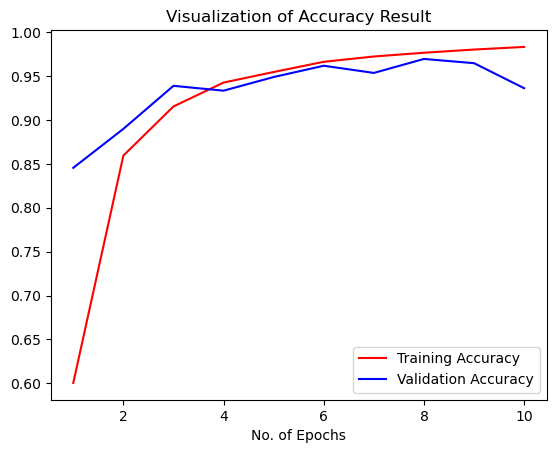

In [30]:
#Accuracy Visualisation
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [31]:
#Some other metrics for model evaluation
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper_bell___Bacterial_spot',
 'Pepper_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_sp

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 173s 315ms/step


(array([[1.00000000e+00, 2.32325164e-08, 1.38816543e-13, ...,
         3.76225698e-17, 1.50856541e-16, 4.09704881e-15],
        [9.99949932e-01, 5.00380556e-05, 1.06975566e-11, ...,
         2.07691589e-15, 1.70596688e-14, 3.06819294e-13],
        [1.00000000e+00, 1.86918570e-09, 6.97895301e-13, ...,
         2.16877261e-17, 4.03837781e-16, 4.90348855e-15],
        ...,
        [1.22491151e-09, 1.36922817e-11, 9.44747747e-09, ...,
         1.90982563e-09, 4.17496454e-11, 9.99978900e-01],
        [7.84174836e-10, 4.97819624e-12, 6.92877311e-10, ...,
         3.05462278e-09, 7.31234691e-12, 9.99999642e-01],
        [1.61056238e-10, 3.25016533e-12, 5.41125825e-11, ...,
         1.53130182e-11, 1.10081846e-10, 9.99962926e-01]], dtype=float32),
 (17572, 38))

In [34]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
from sklearn.metrics import classification_report,confusion_matrix


In [38]:
print (classification_report(Y_true,predicted_categories,target_names = class_name ))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.74      0.97      0.84       504
                                 Apple___Black_rot       0.91      1.00      0.95       497
                          Apple___Cedar_apple_rust       0.96      0.93      0.95       440
                                   Apple___healthy       0.93      0.93      0.93       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.98      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.79      0.87       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.97      0.

In [39]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[490,   7,   0, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [ 10,   0, 411, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   1, ...,   0, 436,   0],
       [  0,   0,   1, ...,   0,   0, 467]], dtype=int64)

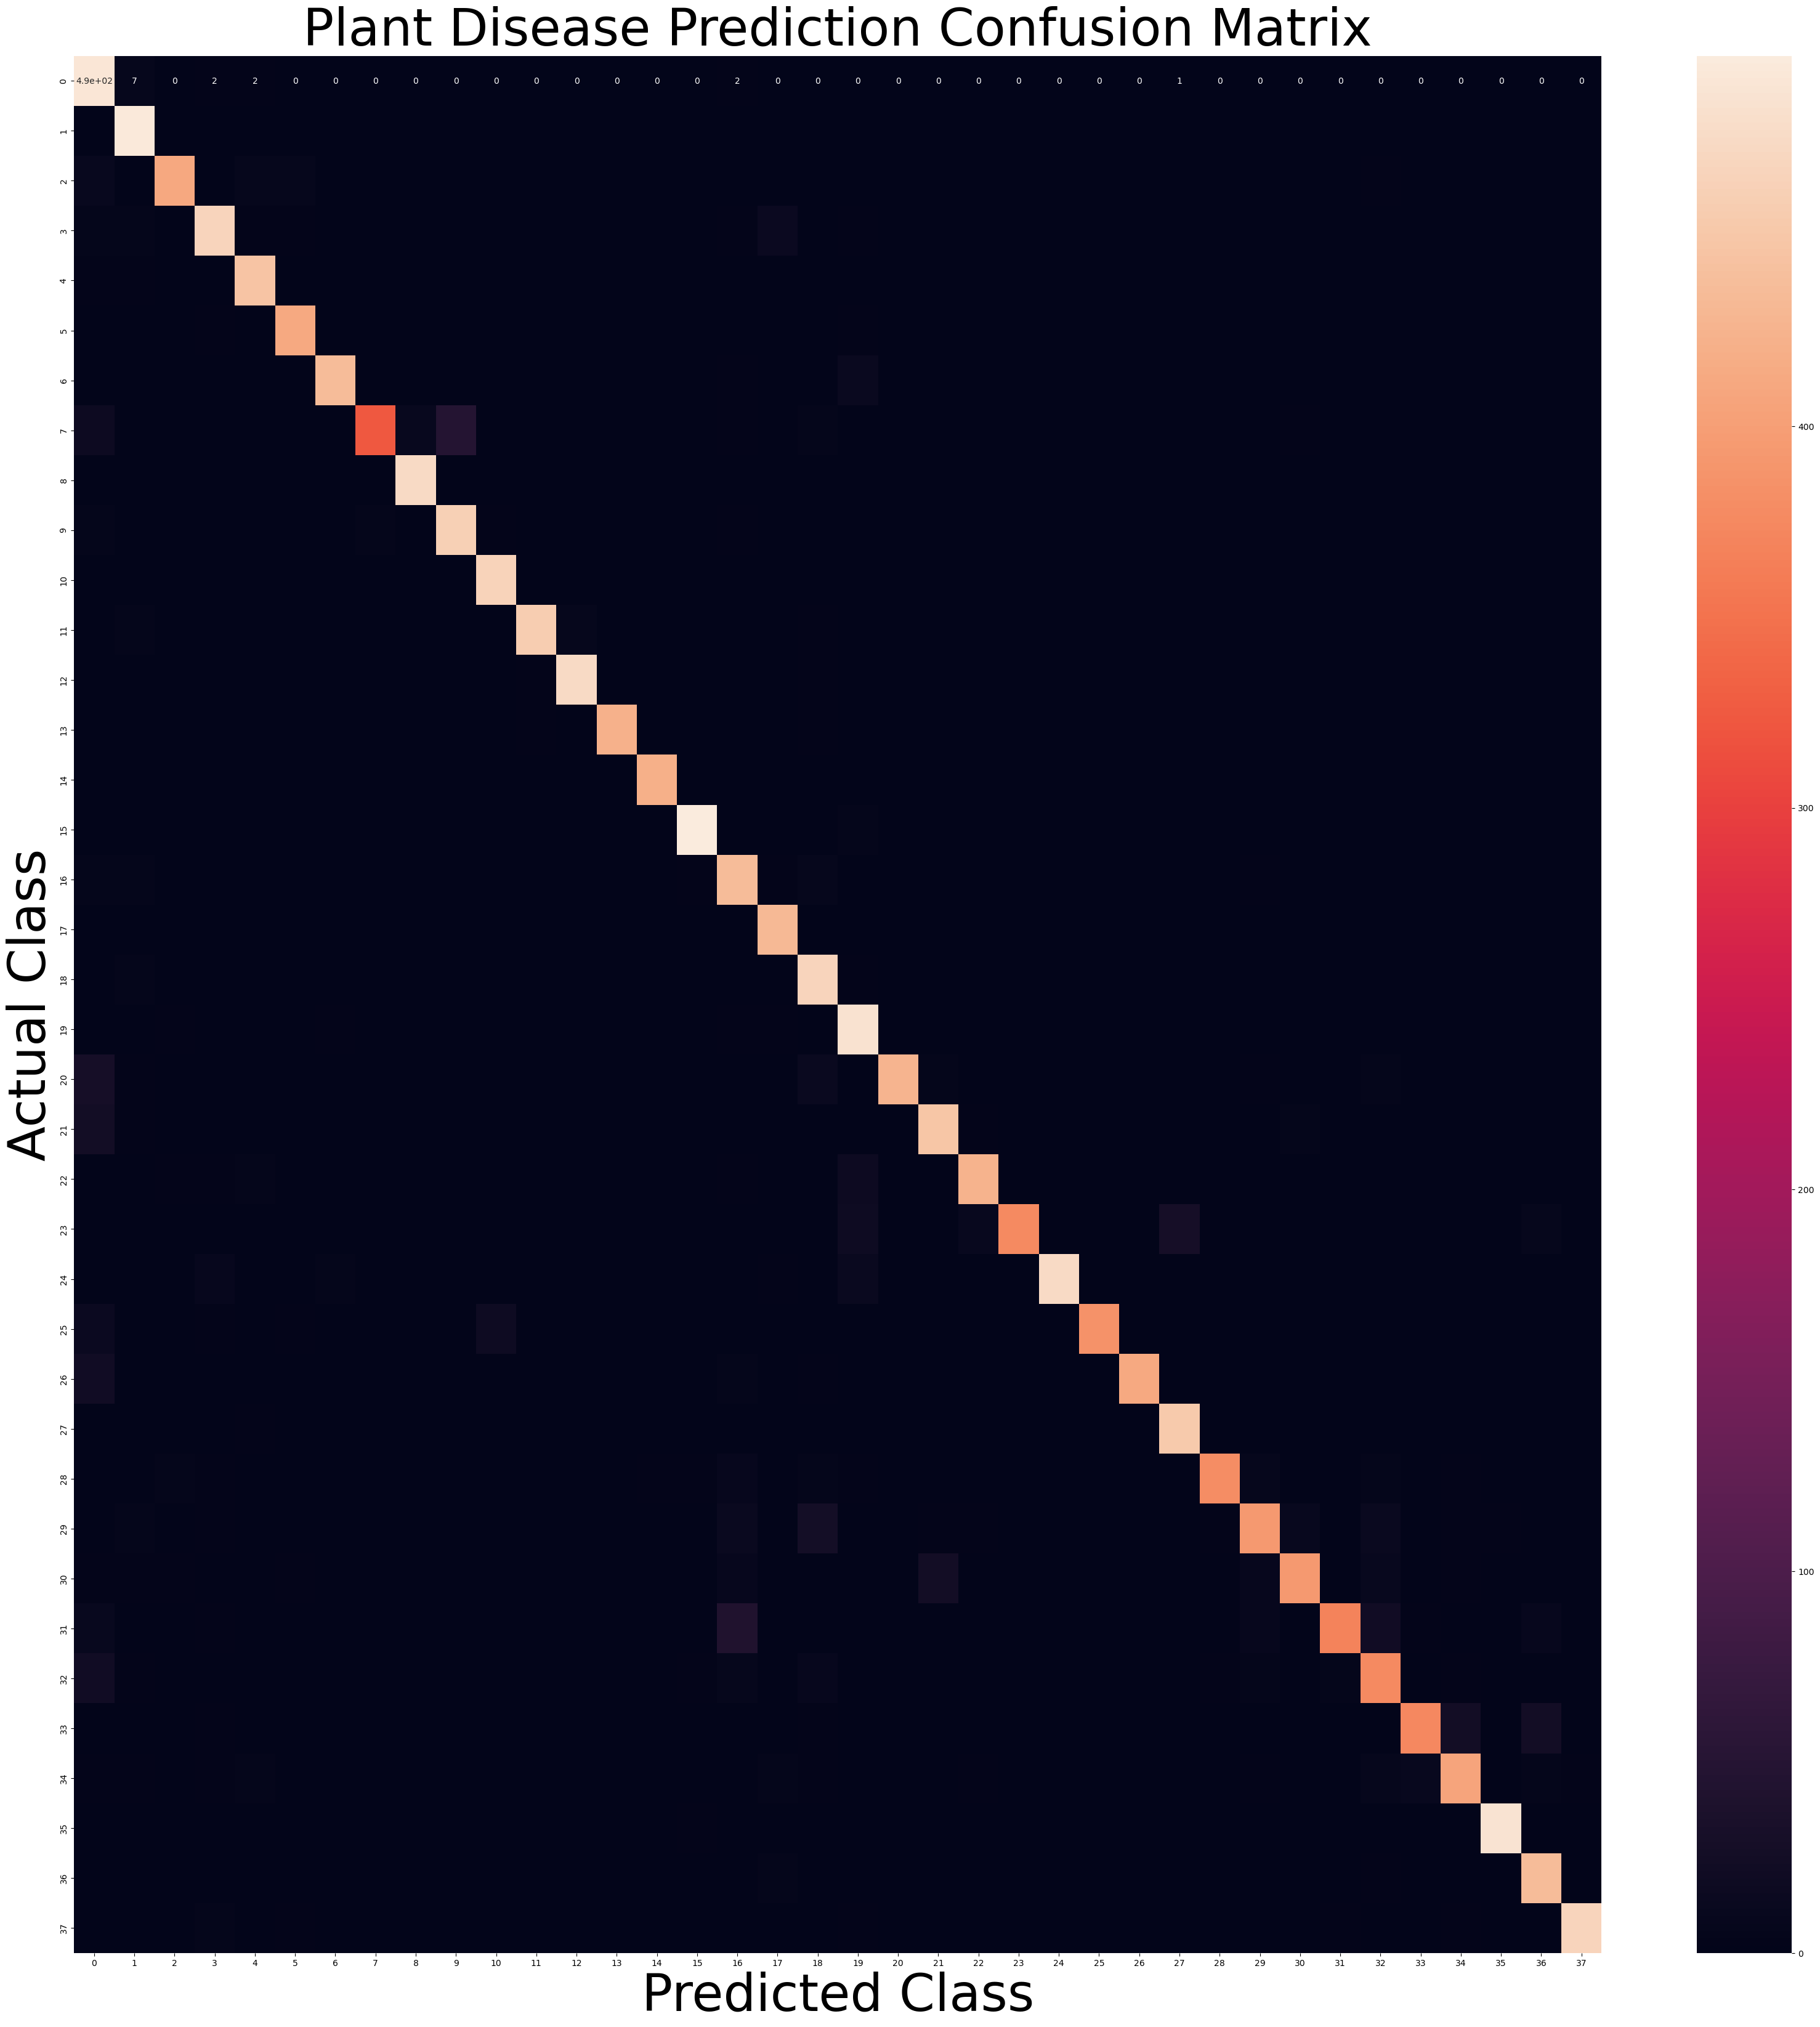

In [40]:
#Confusion Matrix VISUALISATION 

plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 60)
plt.ylabel('Actual Class',fontsize = 60)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 60)
plt.show()